In [1]:
#########LOAD DATA
%matplotlib widget

import numpy as np
import librosa
import librosa.display
import os
from pydub import AudioSegment, effects
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pathAudio = "Normalized/LP/Neck/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
print(files.shape)

X = []
Z = []
datastft = []
waveforms = []

for file in files:
  x,fs = librosa.load(file,sr=None, mono = True, duration=1.0) 

  ##Comparing each audio file
  X.append(x)
  Z.append(librosa.feature.spectral_bandwidth(y=x, sr=fs))
  y = librosa.stft(x, n_fft=512, hop_length= 1024)
  datastft.append(y)
  waveforms.append(x)


X = np.array(X)
print("The shape of X is")
print(X.shape)

Z = np.array(Z)
print(Z.shape)
Z = np.reshape(Z,(1103, 87))
print("The shape of Z is")
print(Z.shape)

mux = np.mean(X, axis=0)
print(mux.shape)
stdx = np.max(X, axis=0)
print(stdx.shape)
Xmus = (X-mux)/stdx
print(Xmus.shape)

muz = np.mean(Z, axis=0)
print(muz.shape)
stdz = np.std(Z, axis=0)
print(stdz.shape)
Zmus = (Z-muz)/stdz
print(Zmus.shape)

C:\Users\LENOVO LEGION  Y720\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


(1103,)
The shape of X is
(1103, 44100)
(1103, 1, 87)
The shape of Z is
(1103, 87)
(44100,)
(44100,)
(1103, 44100)
(87,)
(87,)
(1103, 87)


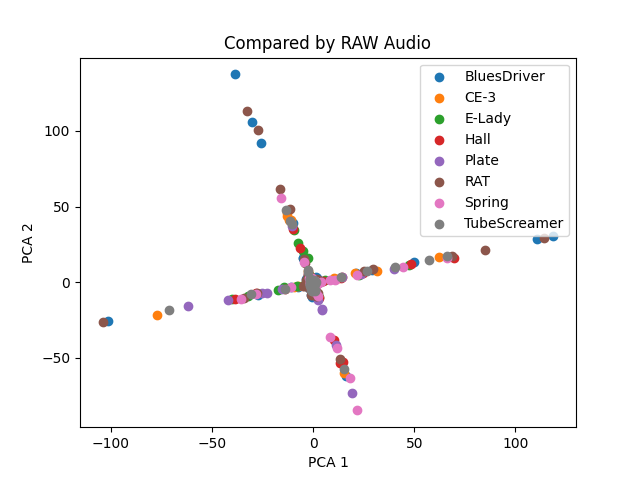

In [10]:
pcax = PCA(n_components=8)
X_PCA = pcax.fit_transform(Xmus)
plt.close() 
plt.scatter(X_PCA[:137, 0],X_PCA[:137, 1], label='BluesDriver')
plt.scatter(X_PCA[138:275, 0],X_PCA[138:275, 1], label='CE-3')
plt.scatter(X_PCA[276:413, 0],X_PCA[276:413, 1], label='E-Lady')
plt.scatter(X_PCA[414:551, 0],X_PCA[414:551, 1], label='Hall')
plt.scatter(X_PCA[552:689, 0],X_PCA[552:689, 1], label='Plate')
plt.scatter(X_PCA[690:827, 0],X_PCA[690:827, 1], label='RAT')
plt.scatter(X_PCA[828:965, 0],X_PCA[828:965, 1], label='Spring')
plt.scatter(X_PCA[966:1103, 0],X_PCA[966:1103, 1], label='TubeScreamer')

plt.title('Compared by RAW Audio')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

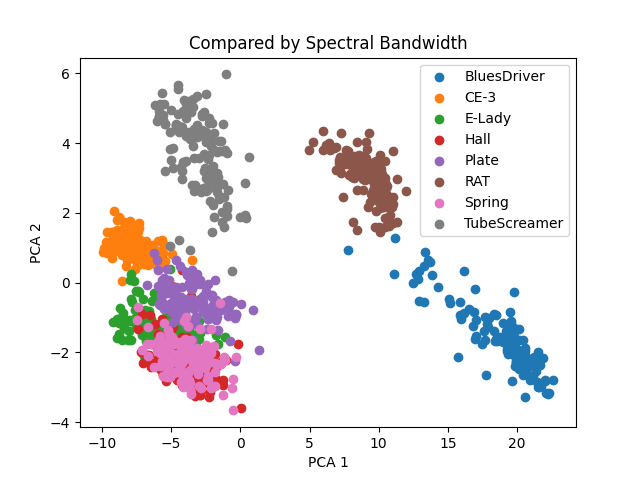

In [7]:
plt.close() 

pcaz = PCA(n_components=8)
Z_PCA = pcaz.fit_transform(Zmus)
plt.scatter(Z_PCA[:137, 0],Z_PCA[:137, 1], label='BluesDriver')
plt.scatter(Z_PCA[138:275, 0],Z_PCA[138:275, 1], label='CE-3')
plt.scatter(Z_PCA[276:413, 0],Z_PCA[276:413, 1], label='E-Lady')
plt.scatter(Z_PCA[414:551, 0],Z_PCA[414:551, 1], label='Hall')
plt.scatter(Z_PCA[552:689, 0],Z_PCA[552:689, 1], label='Plate')
plt.scatter(Z_PCA[690:827, 0],Z_PCA[690:827, 1], label='RAT')
plt.scatter(Z_PCA[828:965, 0],Z_PCA[828:965, 1], label='Spring')
plt.scatter(Z_PCA[966:1103, 0],Z_PCA[966:1103, 1], label='TubeScreamer')

plt.title('Compared by Spectral Bandwidth')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


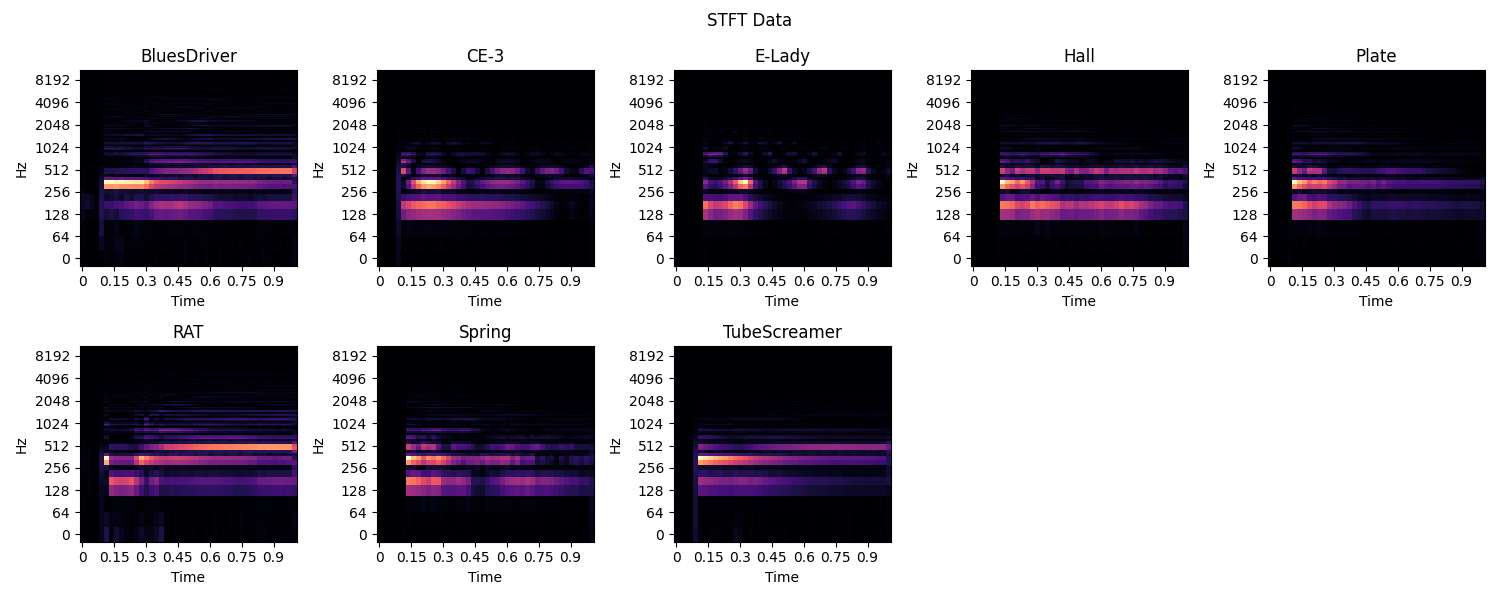

In [4]:
plt.figure(figsize=(15, 6)).suptitle("STFT Data")
plt.title('stft')
sonidos = [0,138,276,414,552,690,828,966]
labelsname = ["BluesDriver","CE-3","E-Lady","Hall","Plate","RAT","Spring","TubeScreamer"]

for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.display.specshow(datastft[x], y_axis='log', x_axis='time')
plt.tight_layout()

plt.show()



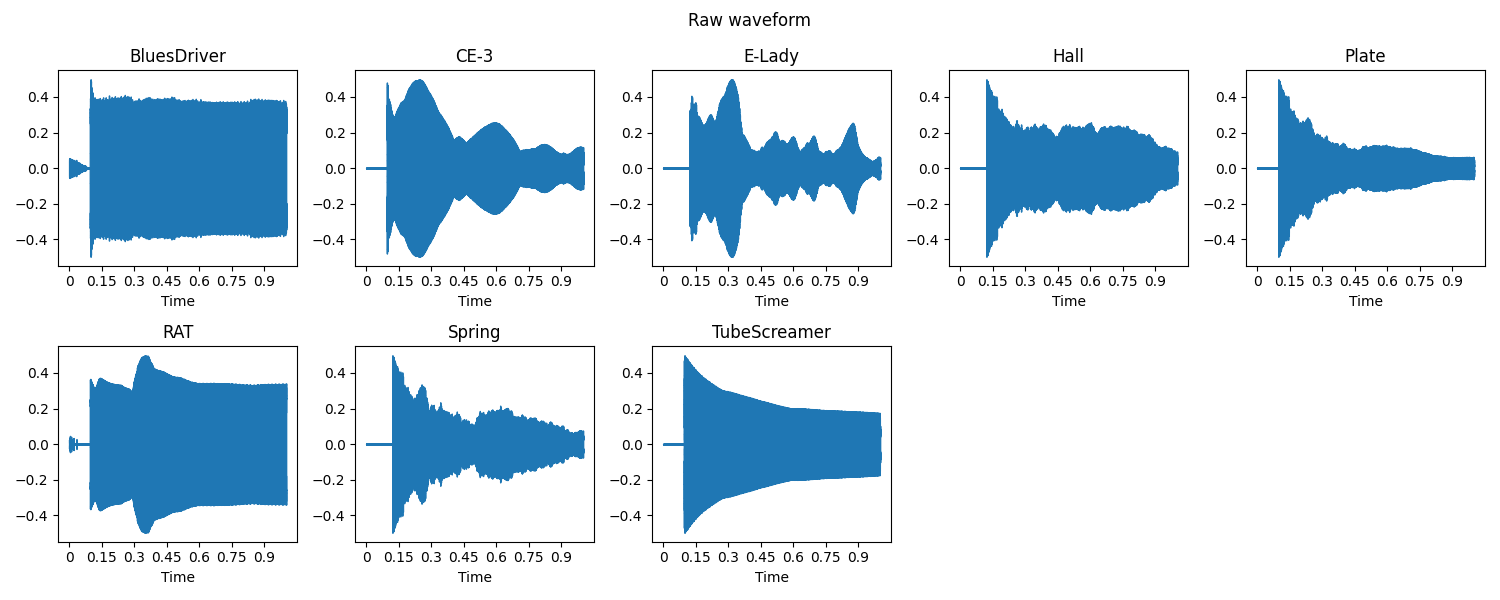

In [8]:
plt.figure(figsize=(15, 6)).suptitle("Raw waveform")
sonidos = [0,138,276,414,552,690,828,966]
labelsname = ["BluesDriver","CE-3","E-Lady","Hall","Plate","RAT","Spring","TubeScreamer"]

for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.display.waveshow(waveforms[x],sr=fs)
plt.tight_layout()

plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\LENOVO LEGION  Y720\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


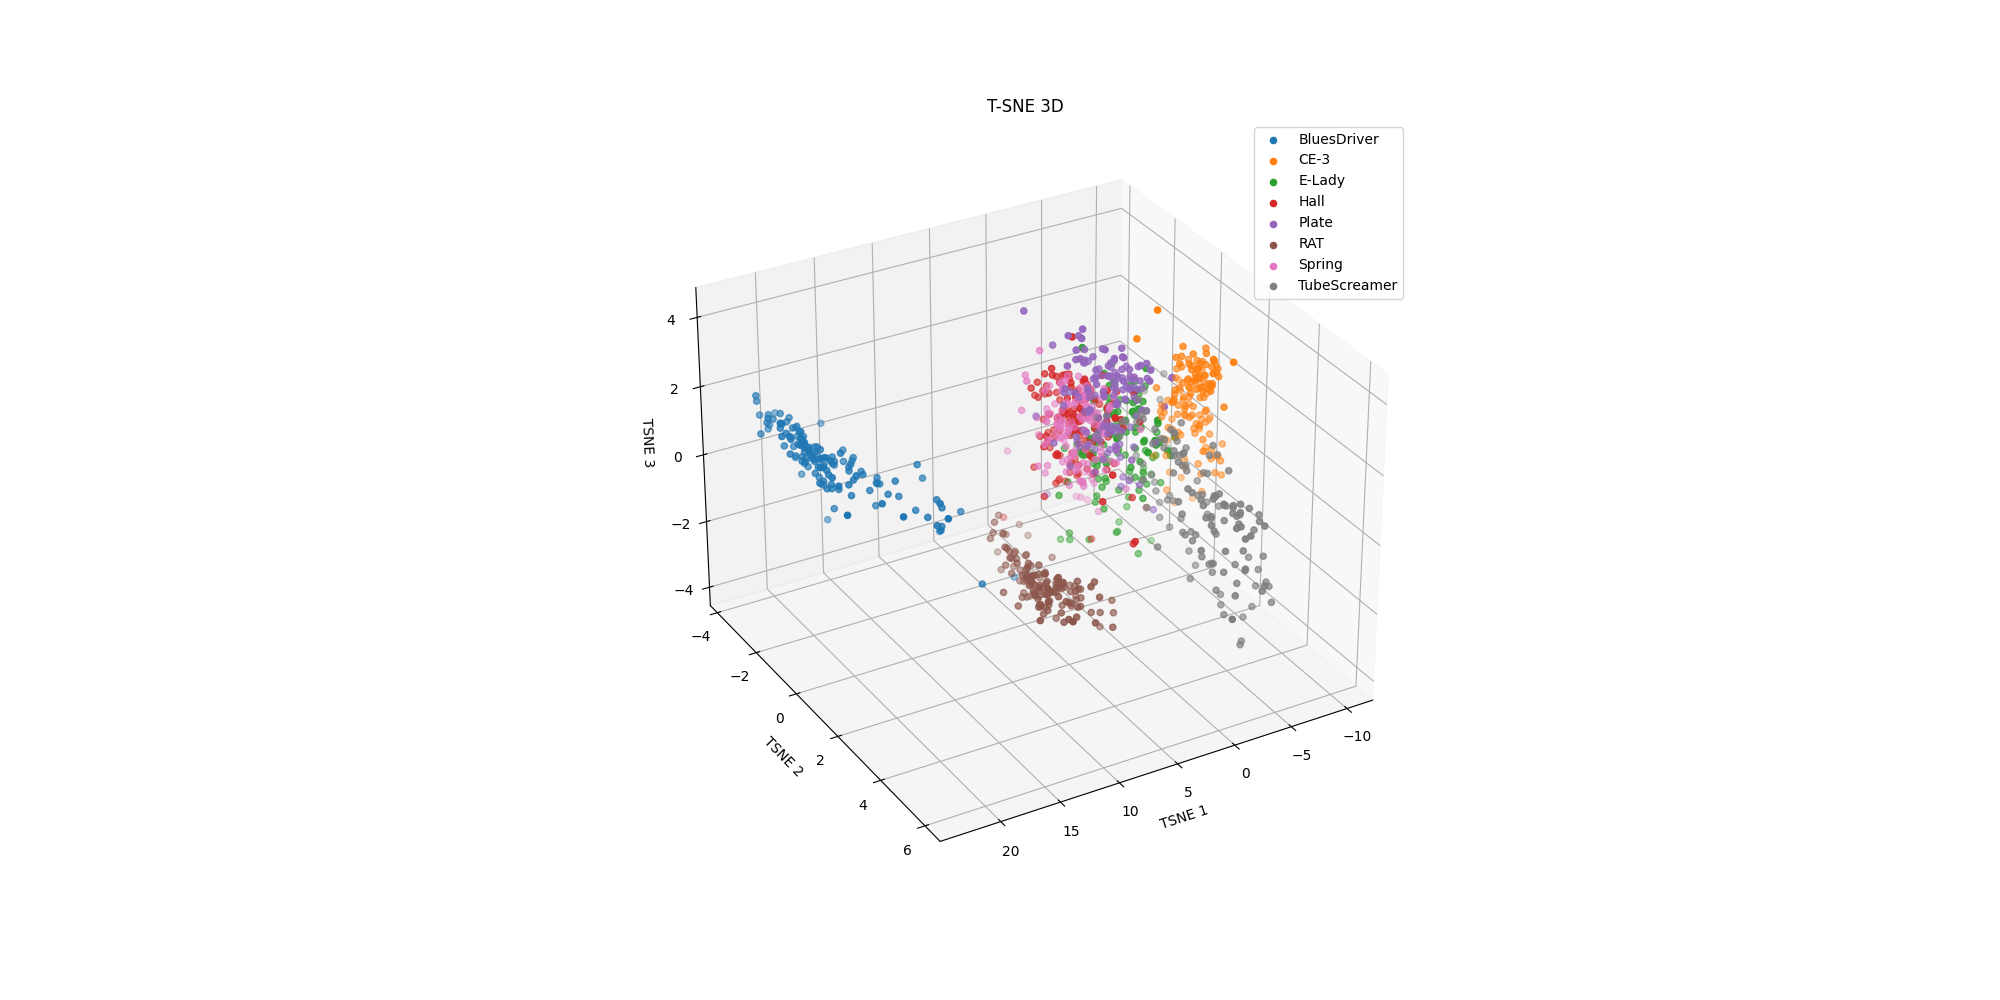

In [11]:
###t-SNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE  # for t-SNE

plt.close() 
plt.close() 
fig = plt.figure(1, figsize=(20, 10))
#ax = Axes3D(fig,elev=-20, azim=100)
tsne = TSNE(init='pca', n_components= 3)  # create an instance of t-SNE
ax = plt.axes(projection = "3d")
X_tsne = tsne.fit_transform(Z)  # fit and transform the data

ax.scatter(Z_PCA[:137, 0],Z_PCA[:137, 1], Z_PCA[:137, 2], label='BluesDriver')
ax.scatter(Z_PCA[138:275, 0],Z_PCA[138:275, 1], Z_PCA[138:275, 2], label='CE-3')
ax.scatter(Z_PCA[276:413, 0],Z_PCA[276:413, 1], Z_PCA[276:413, 2], label='E-Lady')
ax.scatter(Z_PCA[414:551, 0],Z_PCA[414:551, 1], Z_PCA[414:551, 2], label='Hall')
ax.scatter(Z_PCA[552:689, 0],Z_PCA[552:689, 1], Z_PCA[552:689, 2], label='Plate')
ax.scatter(Z_PCA[690:827, 0],Z_PCA[690:827, 1], Z_PCA[690:827, 2], label='RAT')
ax.scatter(Z_PCA[828:965, 0],Z_PCA[828:965, 1], Z_PCA[828:965, 2], label='Spring')
ax.scatter(Z_PCA[966:1103, 0],Z_PCA[966:1103, 1], Z_PCA[966:1103, 2], label='TubeScreamer')


ax.view_init(30,60)
plt.title('T-SNE 3D')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.legend()
plt.show()